In [40]:
import pandas as pd

In [45]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [46]:
df = df[df['IsTrading'] == True]
df = df.drop(columns = ['IsTrading','CoinName','Unnamed: 0'])
df = df.dropna()
df = df[df['TotalCoinsMined'] > 0]
df = pd.get_dummies(df, columns = ['Algorithm','ProofType'])
df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the number of features dramatically increased when creating dummies, aka converting categories into bool values

In [47]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=crypto_pca)

In [52]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.326378e-15,-1.280445e-15,-0.007129,-1.319756,-0.051813,...,-4.948116e-16,3.888930e-15,-1.114145e-15,-1.150971e-15,-7.726513e-16,-3.626465e-16,-3.860201e-15,1.147464e-15,1.733755e-15,-1.388184e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.457883e-15,-1.429030e-15,-0.007739,-1.322514,-0.056674,...,-4.936877e-16,3.702121e-15,7.995353e-16,-1.148781e-15,-7.102306e-16,-1.603443e-16,-3.350430e-15,8.459994e-16,1.233071e-15,-3.191346e-16
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-7.481406e-15,6.356089e-15,-0.054781,-1.542879,-0.943951,...,-3.646047e-14,-4.706507e-14,1.542434e-14,4.329981e-14,-5.319318e-14,-2.722470e-14,2.747110e-14,-5.248317e-14,-6.197070e-15,-1.494373e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,3.040430e-15,-1.007631e-15,-0.002071,0.281463,0.251862,...,-8.634350e-16,-1.033727e-14,-6.523311e-15,8.423110e-15,-1.192233e-14,-5.998331e-16,1.071340e-14,-9.861862e-15,-1.296452e-14,-1.000959e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,1.674182e-15,-1.227687e-15,0.027735,0.519099,0.188820,...,1.284903e-13,-4.695079e-14,-1.009913e-13,-1.083722e-14,-1.847076e-14,-1.811094e-13,3.493308e-14,-1.592085e-14,-7.333712e-14,-9.778724e-14


In [54]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

The pca reduced features from 98 to 74 when preserving 90% of the explained variance

In [70]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=25)
tsne_features = tsne.fit_transform(df_pca)

In [71]:
tsne_features.shape

(532, 2)

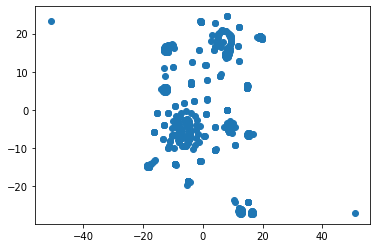

In [72]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

There appears to be at least 3 distinct clusters on the plotted tsne features

In [73]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state = 42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\hhhbh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45721.485720
2,3,44826.969180
3,4,43776.296588
4,5,42924.685122


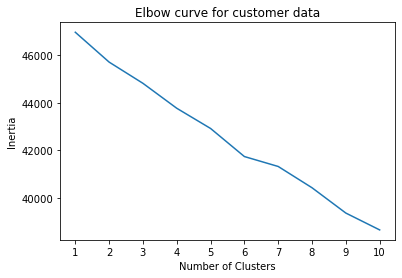

In [74]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

the eblow curve appears to be very weak across most number of clusters interia change. There is a slight change at 6.

# Recommendation to Client
There is strong clustering in the crypto currencies when plotting the tsne features. There is less strength to the clusters on intertia. But, based on this dataset, I can recommend the cryptocurrencies be clustered into 6 clusters for classification.